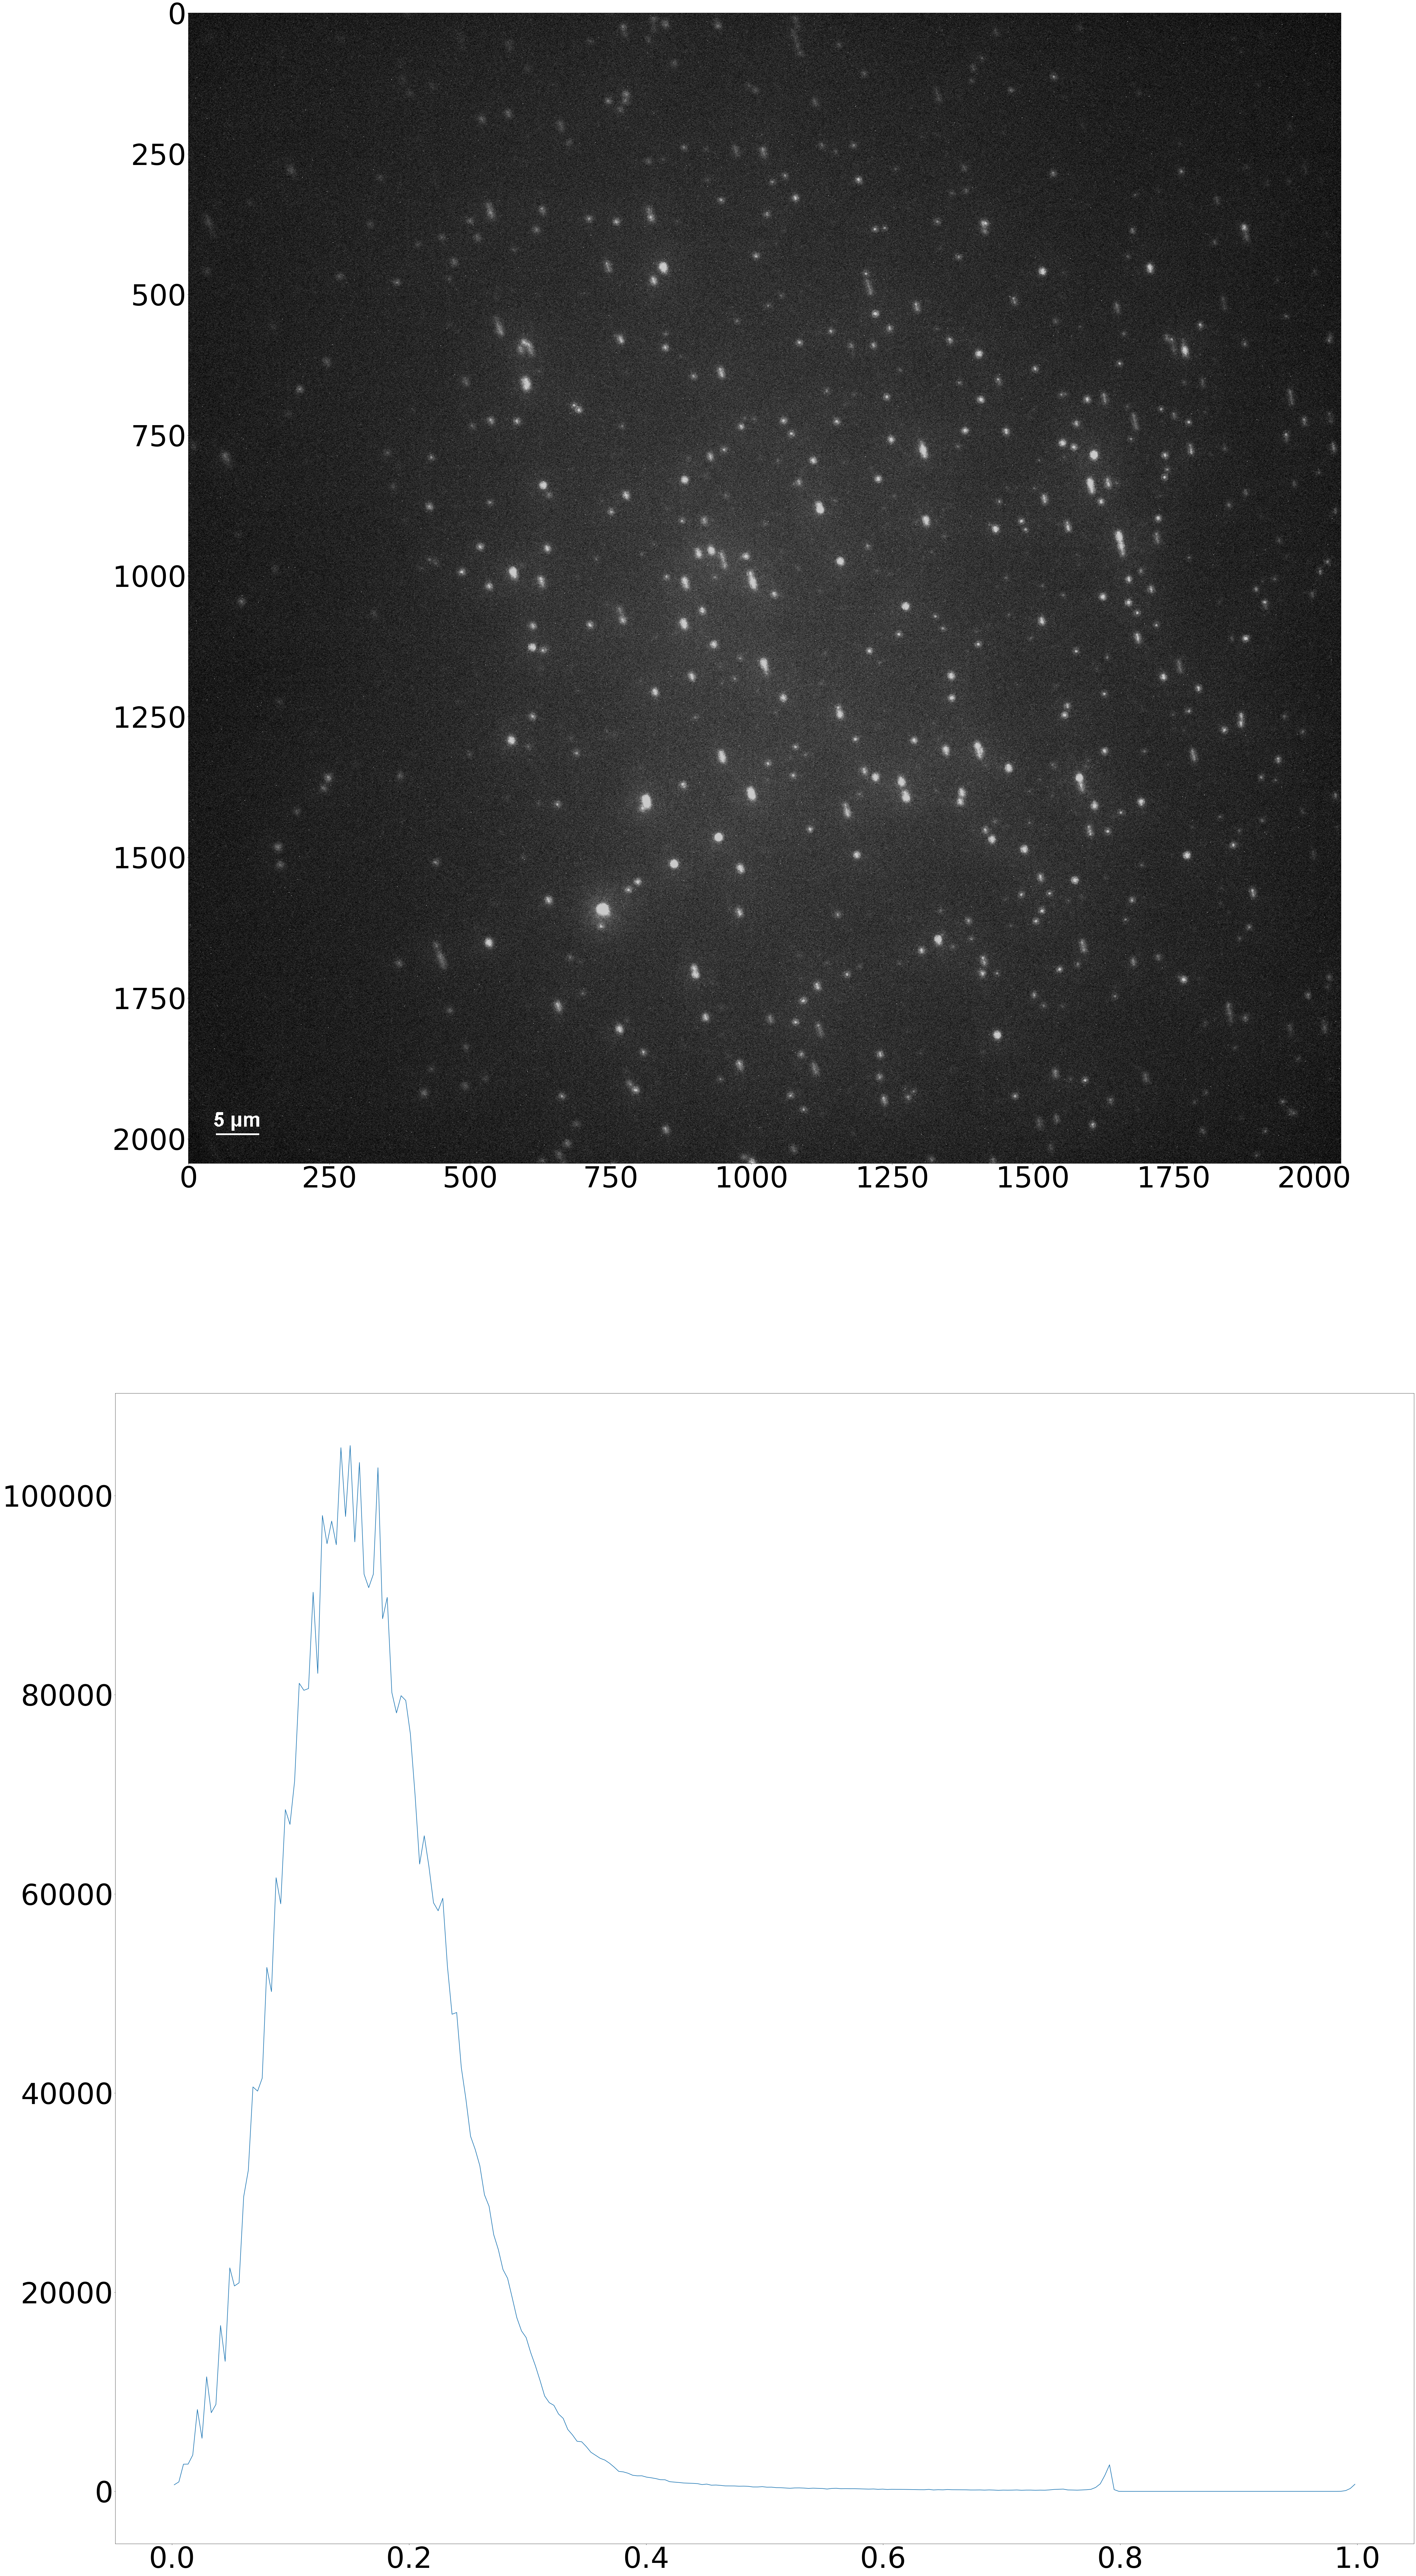

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2gray
from skimage import morphology
%matplotlib inline

image = Image.open('Examples/Device2_Area1_During30kcaseinandADAMTS13flow.jpg')
img_array = np.array(image)
image_gray = rgb2gray(img_array)
hist, hist_centers = histogram(image_gray)

plt.rcParams.update({'font.size': 100})
fig, axes = plt.subplots(2, 1, figsize=(80, 160))
axes[0].imshow(image_gray, cmap=plt.cm.gray)
#axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)

In [2]:
from skimage.filters import sobel
from skimage.color import label2rgb
from scipy import ndimage
import collections

elevation_map = sobel(image_gray)

markers = np.zeros_like(image_gray)
markers[image_gray < .4] = 1                                   #set the threshold as 0.5 in grayscale
markers[image_gray > .4] = 2

segmentation = morphology.watershed(elevation_map, markers)
segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_image_gray, _ = ndimage.label(segmentation)

a = collections.Counter(labeled_image_gray.reshape(-1))
b=collections.Counter(el for el in a.elements() if a[el] >=50)   #set the threshold as 50 pixels

sorted_val=[]
for key,val in b.items():
    sorted_val.append(key)
sorted_val=sorted_val[1:]                                       #get rid of sorted_val[0]=0
print(sorted_val)

[432, 474, 533, 554, 591, 600, 622, 705, 741, 742, 753, 767, 816, 844, 918, 959, 1014, 1025, 1093, 1115, 1121, 1130, 1149, 1167, 1172, 1176, 1208, 1298, 1342, 1457, 1481, 1485, 1530, 1598, 1608, 1611, 1633, 1642, 1663, 1706, 1711, 1730, 1762, 1780, 1789, 1807, 1817, 1842, 1858, 1892, 1902, 1935, 2097, 2099, 2116, 2129, 2131, 2145, 2263, 2304, 2349, 2382, 2411, 2459, 2520, 2529, 2538, 2604, 2650, 2703, 2833, 2857, 2863, 2894, 2939, 2970, 3037, 3168, 3212, 3218, 3298, 3314, 3328, 3346, 3443, 3499, 3589, 3620, 3700, 3738, 3796, 3917, 3953, 3956, 3991, 4022, 4128, 4152, 4182, 4238, 4277, 4316, 4331, 4458, 4641, 4645, 4669, 4835, 4843, 4919, 4929, 5038, 5057, 5134, 5144, 5151, 5307, 5390, 5401, 5415, 5452, 5483, 5488, 5531, 5561, 5571, 5727, 5781, 5844, 5914, 5917, 5931, 5961, 6061, 6155, 6206, 6291, 6380, 6417, 6470, 6729, 6733, 6742, 6791, 6828, 6906, 6962, 6965, 7019, 7058, 7139, 7157, 7167, 7213, 7253, 7308, 7371, 7426, 7436, 7515, 7552, 7621, 7629, 7643, 7687, 7743, 7789, 7822, 7842, 7

In [6]:
from skimage.measure import label, regionprops
plt.rcParams['figure.max_open_warning'] = 0
             
for i in sorted_val:
    seg_map = np.copy(labeled_image_gray)
    x,y=np.where(labeled_image_gray == i)
    seg_map[labeled_image_gray != i] = 0
    cropped = seg_map[x[0]-20:x[0]+60,y[0]-30:y[0]+50]
    #image_gray=image_gray[x[0]-20:x[0]+60,y[0]-30:y[0]+50]
    label_img = label(cropped, connectivity=cropped.ndim)
    props = regionprops(label_img,intensity_image=image_gray, coordinates='xy')
    if props[0].eccentricity>.8:                             #set the threshold of unraveling as eccentricity>0.8
#        print(props[0].eccentricity)
        plt.figure()
        plt.axis('off')
        plt.imshow(cropped, cmap=plt.cm.gray)

ValueError: Label and intensity image must have thesame shape.

In [4]:
from skimage.measure import label, regionprops
props = regionprops(labeled_image_gray,intensity_image=image_gray, coordinates='xy')

In [12]:
labeled_image_gray.shape

(2044, 2048)

In [ ]:
image_gray.shape

In [12]:
for i in props: 
    print(i.eccentricity)

0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.5790107763295734
0
0
0
0
0
0
0.7084865030471647
0
0
0.5853689064968591
0
0
0
0
0
0.816496580927726
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0.34395801958630706
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.7905694150420949
0
0
0
0
0.6461833750369724
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.39896318462000147
0
0.6029249388003656
0
0
0
0
0.9128709291752769
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
1.0
1.0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
1.0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0.787091262435293
0.6861875699480072
0
0
0
0.8007660042226692

0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0.44463669173645554
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.7333550558169856
0
0
0
0
0
0
0
0
0.1701257187530255
0
0
0
0
0
0
0
1.0
0.44285567657007685
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
1.0
0.738267992606662
0
0
0
0
0
1.0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0.7332476483785862
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0.8955056301262652
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0.377964473009227
0
0
0
1.0
0
0
0
0
0.4961660548065993
0
0
0
0
0
0.816496580927726
1.0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0.9128709291752769
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0.6436616427013102
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.9574894186366826
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.6313509898525013
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.9128709

0
1.0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.7880455678098066
0
0
0
0
0
1.0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
1.0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0.9052646725406871
0
0
0
0
1.0
0
1.0
1.0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
1.0
0
0
0
0
0
1.0
0
0
0
0
0
0.816496580927726
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
1.0
0
0
0
1.0
0
0
0.7239345955865268
0
0
0
0.5549383347366958
0
0
0
0
1.0
0
0
0
0
0
0
0
1.0
1.0
0.673416165313454
0
0
0
0
0
0
0
0.7905694150420949
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
1.0
0.816496580927726
0
0
0
0
0
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0.3517990664487163
0
0
1.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.0
0.5750901891443437
0
0
0
0
0
0
0
0
0
0
0
0.6945875203623408
0
0
0
0
0
0
0
0
0
0
0.816496580927726
0
1.0
0
0
0
0
0
0
0
0
0
0
0
1.0
0
0
0
1.0
0
0
0
0
0
0.6667712602178757
0
0
0
0
0
0.87525